# Installation

In [ ]:
!pip install qiskit==0.39.2
! pip install qiskit.ignis
!pip install pylatexenc
!pip install qiskit-aer

In [ ]:
import qiskit
import math
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [ ]:
# useful additional packages
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer

# import basic plot tools
from qiskit.tools.visualization import circuit_drawer, plot_histogram,plot_bloch_multivector

### Alice's x qubit

In [ ]:
Key_length = 500
random.seed(0)

In [ ]:
alice_bits = ""
for i in range(Key_length):
    alice_bits += str(random.randint(0,1))

print("The x bits Alice is going to share:  " +alice_bits[:10] + "...")

The x bits Alice is going to share:  1101111110...


In [ ]:
alice_bits[100]

'0'

In [ ]:
len(alice_bits)

500

In [ ]:
def generate_random_bases(num_of_bases):
    bases_string = ""
    for i in range(num_of_bases):
        randBasis = random.randint(0,1)

        if randBasis == 0:
            bases_string += "Z"
        else:
            bases_string += "Z"

    return bases_string

In [ ]:
alice_x_bases = generate_random_bases(Key_length)
print("The x bases Alice is going to use:  " +alice_x_bases[:10] + "...")

The x bases Alice is going to use:  ZZZZZZZZZZ...


In [ ]:
# Creating registers
qr = QuantumRegister(2, name="qr") #bob's
qr1 = QuantumRegister(1, name="qr1")  #alice x qubit
cr = ClassicalRegister(6, name="cr")

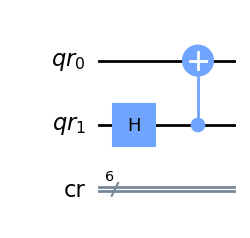

In [ ]:
#bobs entangled circuit
singlet = QuantumCircuit(qr, cr, name='singlet')
singlet.h(qr[1])
singlet.cx(qr[1],qr[0])
singlet.draw(output = 'mpl')

In [ ]:
def encode(bits,bases):

    encoded_x_qubits =[]

    for bit,basis in zip(bits,bases):
        qc = QuantumCircuit(qr1,cr)

        #Possible cases
        if bit=="0" and basis == "Z":
            encoded_x_qubits.append(qc)

        elif bit=="1" and basis == "Z":
            qc.x(0)
            encoded_x_qubits.append(qc)

    return(encoded_x_qubits)

In [ ]:
encoded_x_qubits = encode(alice_bits,alice_x_bases)

for i in range(5):
    print(encoded_x_qubits[i].draw(output='text'))
print("etc.")

      ┌───┐
 qr1: ┤ X ├
      └───┘
cr_0: ═════
           
cr_1: ═════
           
cr_2: ═════
           
cr_3: ═════
           
cr_4: ═════
           
cr_5: ═════
           
      ┌───┐
 qr1: ┤ X ├
      └───┘
cr_0: ═════
           
cr_1: ═════
           
cr_2: ═════
           
cr_3: ═════
           
cr_4: ═════
           
cr_5: ═════
           
      
 qr1: 
      
cr_0: 
      
cr_1: 
      
cr_2: 
      
cr_3: 
      
cr_4: 
      
cr_5: 
      
      ┌───┐
 qr1: ┤ X ├
      └───┘
cr_0: ═════
           
cr_1: ═════
           
cr_2: ═════
           
cr_3: ═════
           
cr_4: ═════
           
cr_5: ═════
           
      ┌───┐
 qr1: ┤ X ├
      └───┘
cr_0: ═════
           
cr_1: ═════
           
cr_2: ═════
           
cr_3: ═════
           
cr_4: ═════
           
cr_5: ═════
           
etc.


In [ ]:
circuits = []   # the list in which the created circuits will be stored

for i in range(Key_length):
    #Create a new circuit by combining the singlet state of alice and bob with the qubit x
    circuitName = singlet + encoded_x_qubits[i]

    #Append the combined circuit to the list of circuits
    circuits.append(circuitName)


<ipython-input-14-54c320cedaaa>:5: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circuitName = singlet + encoded_x_qubits[i]


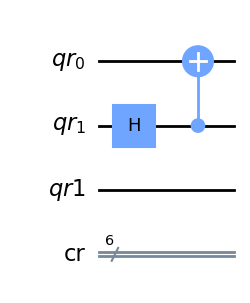

In [ ]:
circuits[2].draw(output='mpl')

In [ ]:
for i in range (Key_length):
    circuits[i].swap(qr1[0],qr[1])
    circuits[i].cx(qr1[0],qr[1])
    circuits[i].h(qr1[0])
    circuits[i].cx(qr1[0],qr[1])

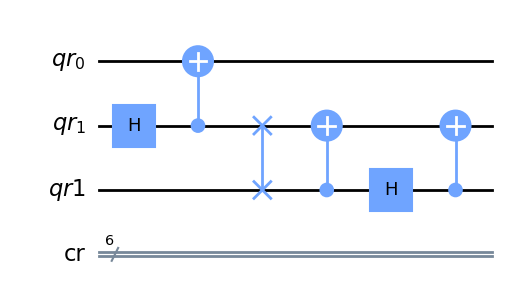

In [ ]:
circuits[2].draw(output='mpl')

In [ ]:
#latex output
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex
initial = Statevector.from_int(0,8)
state = initial.evolve(circuits[2])
state.draw('latex')

<ipython-input-18-b72159f6ec60>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  initial = Statevector.from_int(0,8)


<IPython.core.display.Latex object>

In [ ]:
for i in range (Key_length):
    circuits[i].swap(qr[1],qr[0])
    circuits[i].cx(qr[1],qr[0])
    circuits[i].h(qr[1])
    circuits[i].cx(qr[1],qr[0])

In [ ]:
#latex output
from qiskit.quantum_info import Operator, Statevector
from qiskit.visualization import array_to_latex
initial = Statevector.from_int(0,8)
state = initial.evolve(circuits[2])
state.draw('latex')

<ipython-input-20-b72159f6ec60>:4: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  initial = Statevector.from_int(0,8)


<IPython.core.display.Latex object>

In [ ]:
# measure the spin projection of Alice's x_qubit onto the standard Z basis
measureX = QuantumCircuit(qr,qr1, cr, name='measureX')
measureX.measure(qr[0],cr[0])


## Alice's entangled qubit(qr1[0])

# measure the spin projection of Alice's qubit onto the a_1 direction (X basis)
measureA1 = QuantumCircuit(qr,qr1, cr, name='measureA1')
measureA1.h(qr1[0])
measureA1.measure(qr1[0],cr[2])

# measure the spin projection of Alice's qubit onto the a_2 direction (W basis)
measureA2 = QuantumCircuit(qr,qr1, cr, name='measureA2')
measureA2.s(qr1[0])
measureA2.h(qr1[0])
measureA2.t(qr1[0])
measureA2.h(qr1[0])
measureA2.measure(qr1[0],cr[2])

# measure the spin projection of Alice's qubit onto the a_3 direction (standard Z basis)
measureA3 = QuantumCircuit(qr,qr1, cr, name='measureA3')
measureA3.measure(qr1[0],cr[2])

## Bob's entangled qubit(qr[1])

# measure the spin projection of Bob's qubit onto the b_1 direction (W basis)
measureB1 = QuantumCircuit(qr,qr1, cr, name='measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])

# measure the spin projection of Bob's qubit onto the b_2 direction (standard Z basis)
measureB2 = QuantumCircuit(qr,qr1, cr, name='measureB2')
measureB2.measure(qr[1],cr[1])

# measure the spin projection of Bob's qubit onto the b_3 direction (V basis)
measureB3 = QuantumCircuit(qr,qr1, cr, name='measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])


## Lists of measurement circuits
#store measurement results of x qubit for the Z basis
#measureX = [measureX]

#store alice's measurement circuits for the a_1,a_2,and a_3 directions
aliceMeasurements = [measureA1, measureA2, measureA3]
#store bob's measurement circuits for the b_1,b_2,and b_3 directions
bobMeasurements = [measureB1, measureB2, measureB3]


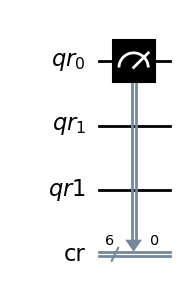

In [ ]:
measureX.draw(output = 'mpl')

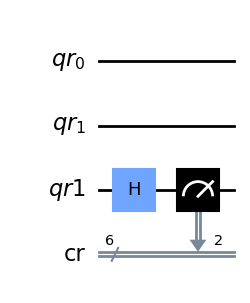

In [ ]:
measureA1.draw(output = 'mpl')

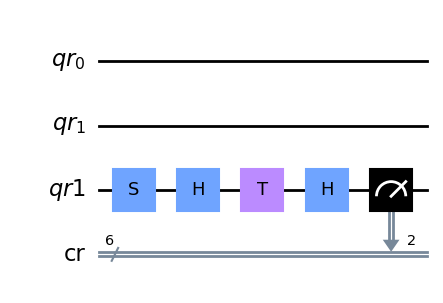

In [ ]:
measureA2.draw(output = 'mpl')

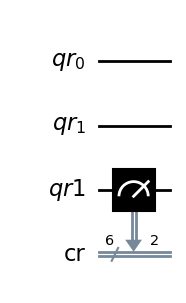

In [ ]:
measureA3.draw(output = 'mpl')

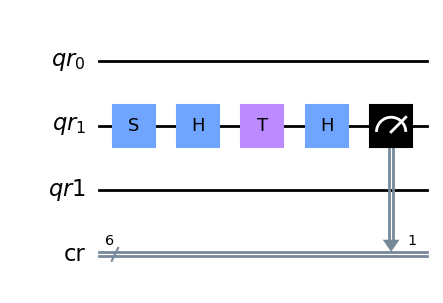

In [ ]:
measureB1.draw(output = 'mpl')

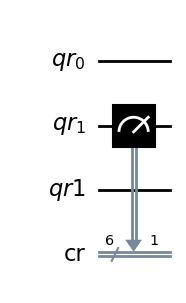

In [ ]:
measureB2.draw(output = 'mpl')

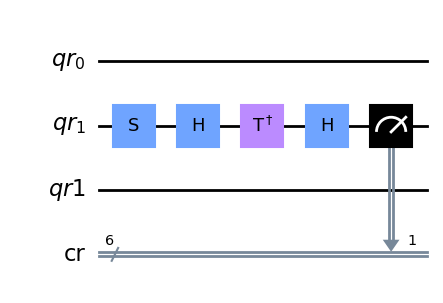

In [ ]:
measureB3.draw(output = 'mpl')

In [ ]:
# Randomly select measurement settings for Alice and Bob for each singlet
aliceMeasurementChoices = [random.randint(1, 3) for i in range(Key_length)] # string b of Alice
bobMeasurementChoices = [random.randint(1, 3) for i in range(Key_length)] # string b' of Bob

In [ ]:
print(aliceMeasurementChoices)

[3, 3, 3, 3, 3, 2, 1, 1, 2, 3, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 2, 3, 3, 2, 3, 3, 1, 1, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 1, 1, 3, 1, 3, 3, 3, 2, 2, 2, 1, 3, 2, 3, 3, 1, 1, 2, 3, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 3, 1, 3, 1, 2, 1, 2, 1, 3, 2, 1, 3, 3, 2, 3, 3, 1, 1, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 2, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 2, 1, 2, 2, 3, 1, 1, 1, 3, 2, 2, 1, 1, 1, 3, 1, 3, 3, 2, 1, 2, 1, 2, 2, 1, 3, 2, 2, 3, 1, 3, 1, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2, 3, 1, 1, 3, 1, 2, 1, 2, 2, 3, 3, 2, 2, 3, 2, 1, 2, 3, 1, 1, 3, 3, 1, 3, 3, 1, 2, 1, 1, 3, 2, 3, 1, 2, 3, 1, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 1, 1, 2, 1, 1, 3, 1, 1, 2, 3, 1, 1, 2, 3, 1, 3, 2, 2, 1, 3, 3, 1, 2, 1, 2, 1, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 3, 3, 3, 1, 2, 2, 

In [ ]:
print(bobMeasurementChoices)

[2, 3, 3, 1, 1, 2, 1, 3, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 3, 2, 2, 2, 3, 1, 2, 1, 1, 1, 3, 2, 1, 1, 2, 3, 2, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 3, 3, 2, 3, 2, 3, 1, 2, 2, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 2, 1, 1, 1, 1, 2, 3, 2, 2, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 3, 3, 1, 3, 1, 1, 3, 1, 3, 2, 3, 3, 1, 2, 3, 3, 2, 2, 1, 3, 1, 2, 1, 2, 3, 1, 2, 1, 3, 3, 2, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3, 2, 3, 3, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 1, 2, 1, 1, 2, 2, 3, 2, 3, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 1, 2, 3, 2, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3, 1, 1, 2, 2, 3, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 2, 1, 1, 3, 2, 2, 2, 3, 2, 3, 3, 1, 3, 2, 3, 2, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3, 2, 1, 1, 1, 3, 2, 1, 

In [ ]:
final_circuits = []   # the list in which the created circuits will be stored

for i in range(Key_length):
    #Create a new circuit by combining the singlet state with the measurement circuits chosen by Alice and Bob
    final_circuitName = circuits[i] + aliceMeasurements[aliceMeasurementChoices[i]-1] + bobMeasurements[bobMeasurementChoices[i]-1] + measureX

    #Append the combined circuit to the list of circuits
    final_circuits.append(final_circuitName)

<ipython-input-32-44f99ded3381>:5: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  final_circuitName = circuits[i] + aliceMeasurements[aliceMeasurementChoices[i]-1] + bobMeasurements[bobMeasurementChoices[i]-1] + measureX


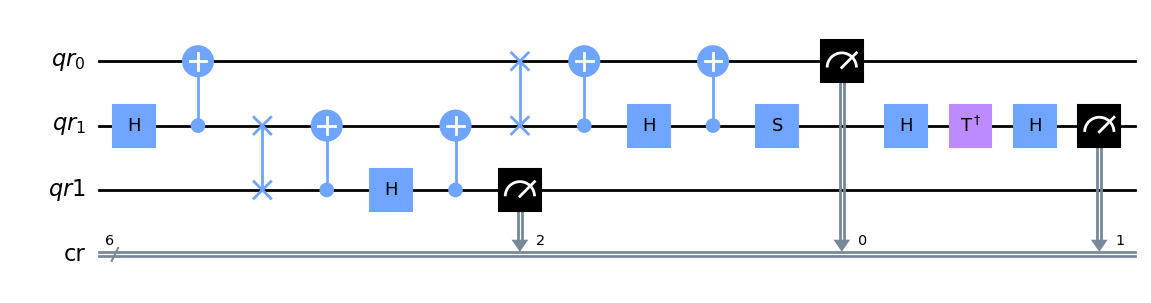

In [ ]:
final_circuits[2].draw(output='mpl')

# Recording the results

In [ ]:
backend=BasicAer.get_backend('qasm_simulator')
result = execute(final_circuits, backend=backend, shots=1).result()

In [ ]:
result.get_counts(final_circuits[2])

{'000110': 1}

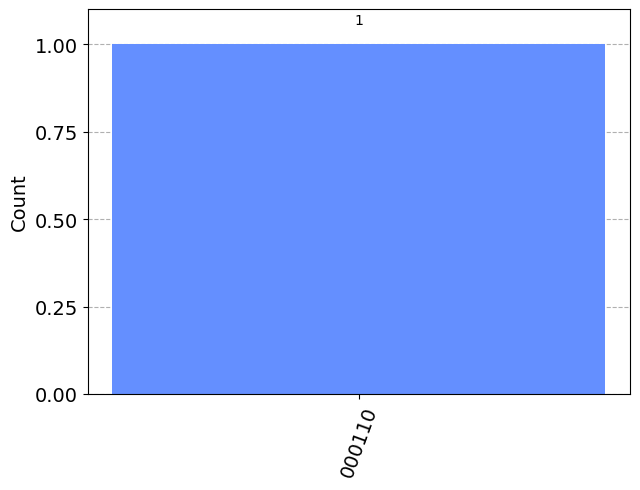

In [ ]:
plot_histogram(result.get_counts(final_circuits[2]))

In [ ]:
# Regular expressions to identify specific measurement outcomes
abPatterns = [
    re.compile('..000$'), # search for the '..000' output (x measured as 0,Alice and Bob both measured 0 )
    re.compile('..010$'), # search for the '..010' output (x measured as 0,Alice mesaured 1 and Bob measured 0)
    re.compile('..100$'), # search for the '..100' output (x measured as 0,Alice mesaured 0 and Bob measured 1)
    re.compile('..110$'),  # search for the '..110' output (x measured as 0,Alice and Bob both measured 1)
    re.compile('..001$'), # search for the '..001' output (x measured as 1,Alice and Bob both measured 0 )
    re.compile('..011$'), # search for the '..011' output (x measured as 1,Alice mesaured 1 and Bob measured 0)
    re.compile('..101$'), # search for the '..101' output (x measured as 1,Alice mesaured 0 and Bob measured 1)
    re.compile('..111$'),  # search for the '..111' output (x measured as 1,Alice and Bob both measured 1)
]

In [ ]:
aliceResults = [] #list to store Alice's measurement results (string a)
bobResults = [] #list to Bob's measurement results (string a')
X_Results = [] #list to store the results of the x measurement (string x)
for i in range(Key_length):

    res = list(result.get_counts(final_circuits[i]).keys())[0] # extract the key result key (measurement outcome)from the i-th circuit

    #Determine Alice's and Bob's results based on the measurement outcome patterns
    if abPatterns[0].search(res): # check if the key is '..000'
        aliceResults.append(0)
        bobResults.append(0)
        X_Results.append(0)
    if abPatterns[1].search(res):  # check if the key is '..010'
        aliceResults.append(1)
        bobResults.append(0)
        X_Results.append(0)
    if abPatterns[2].search(res): # check if the key is '..100'
        aliceResults.append(0)
        bobResults.append(1)
        X_Results.append(0)
    if abPatterns[3].search(res): # check if the key is '..110'
        aliceResults.append(1)
        bobResults.append(1)
        X_Results.append(0)
    if abPatterns[4].search(res): # check if the key is '..001' (if the measurement results are -1,-1)
        aliceResults.append(0)
        bobResults.append(0)
        X_Results.append(1)
    if abPatterns[5].search(res):  # check if the key is '..011'
        aliceResults.append(1)
        bobResults.append(0)
        X_Results.append(1)
    if abPatterns[6].search(res): # check if the key is '..101'
        aliceResults.append(0)
        bobResults.append(1)
        X_Results.append(1)
    if abPatterns[7].search(res): # check if the key is '..111'
        aliceResults.append(1)
        bobResults.append(1)
        X_Results.append(1)

In [ ]:
print(aliceResults)

[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 

In [ ]:
print(bobResults)

[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 

In [ ]:
print(X_Results)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 

In [ ]:
len(X_Results)

500

In [ ]:
X_Results[100]

0

In [ ]:
aliceKey = [] # Alice's key string k
bobKey = [] # Bob's key string k'
#Xkey = [] # x key string x'
# comparing the stings with measurement choices
for i in range(Key_length):
    # if Alice and Bob have measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
        aliceKey.append(aliceResults[i]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(bobResults[i]) # record the multiplied by -1 i-th result obtained Bob as the bit of the secret key k'

x_key_length = len(X_Results) # length of the secret key
alicekey_length = len(aliceKey) # length of the secret key
bobkey_length = len(bobKey) # length of the secret key
print("Alice's key length :",alicekey_length)
print("Bob's key length :",bobkey_length)
print("x key length :",x_key_length)

Alice's key length : 98
Bob's key length : 98
x key length : 500


In [ ]:
abKeyMismatches = 0 # number of mismatching bits in Alice's and Bob's keys

for j in range(alicekey_length ):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1

In [ ]:
print(aliceKey)

[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]


In [ ]:
print(bobKey)

[1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0]


In [ ]:
print(X_Results)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 

# CHSH inequality test

In [ ]:
# function that calculates CHSH correlation value
def chsh_corr(result):

    # lists with the counts of measurement results
    # each element represents the number of (-1,-1), (-1,1), (1,-1) and (1,1) results respectively
    countA1B1 = [0, 0, 0, 0] # XW observable
    countA1B3 = [0, 0, 0, 0] # XV observable
    countA3B1 = [0, 0, 0, 0] # ZW observable
    countA3B3 = [0, 0, 0, 0] # ZV observable

    for i in range(Key_length):

        res = list(result.get_counts(final_circuits[i]).keys())[0]

        # if the spins of the qubits of the i-th singlet were projected onto the a_1/b_1 directions
        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B1[j] += 1

        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B3[j] += 1

        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B1[j] += 1

        # if the spins of the qubits of the i-th singlet were projected onto the a_3/b_3 directions
        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B3[j] += 1

    # number of the results obtained from the measurements in a particular basis
    total11 = sum(countA1B1)
    total13 = sum(countA1B3)
    total31 = sum(countA3B1)
    total33 = sum(countA3B3)

    # expectation values of XW, XV, ZW and ZV observables (2)
    expect11 = (countA1B1[0] - countA1B1[1] - countA1B1[2] + countA1B1[3])/total11 # -1/sqrt(2)
    expect13 = (countA1B3[0] - countA1B3[1] - countA1B3[2] + countA1B3[3])/total13 # 1/sqrt(2)
    expect31 = (countA3B1[0] - countA3B1[1] - countA3B1[2] + countA3B1[3])/total31 # -1/sqrt(2)
    expect33 = (countA3B3[0] - countA3B3[1] - countA3B3[2] + countA3B3[3])/total33 # -1/sqrt(2)

    corr = expect11 - expect13 + expect31 + expect33 # calculate the CHSC correlation value (3)

    return corr

In [ ]:
corr = chsh_corr(result) # CHSH correlation value

# CHSH inequality test
print('CHSH correlation value: ' + str(round(corr, 3)))

# Keys
print('Length of the final key: ' + str(X_Results+aliceKey))
print('Number of mismatching bits: ' + str(abKeyMismatches) + '\n')

CHSH correlation value: 2.763
Length of the final key: [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,

The CHSH correlation value is very close to its theoretical value 2.828, thus confirming the preservation of quantum entanglement in the absence of an eavesdropper.

In [ ]:
#length of the final key
len(X_Results+aliceKey)

598

The resulting quantum key length is double compared to The standard E91 protocol at the same cost of transmitted qubits.

# Finalize the shared keys

In [ ]:
final_alice_key = X_Results+aliceKey

final_bob_key = X_Results+bobKey

# Generate chaos parameter

In [ ]:
def key_to_decimal(final_alice_key):
    """
    Convert Alice's key,represented as a list of binary values,into a list of decimal values.

    Parameters:
    alicekey(list of int): The binary key generated by Alice

    Returns:
    list of int: A list of decimal values,where each value corresponds to a chunk of 4 binary bits.

    """
    decimal_list = [] #initialize an empty list to store the decimal values

    #iterate through the binary key in chunks of 4 bits
    for i in range(0, len(final_alice_key), 4):
        binary_chunk = final_alice_key[i:i+4] #Extract a chunk of 4 binary bits
        decimal_value = 0 # initialize the decimal value for the current chunk

        #Convert the binary chunk to a decimal value
        for bit in binary_chunk:
            decimal_value = decimal_value * 2 + bit #Update the decimal value by shifting and adding the bit

        decimal_list.append(decimal_value) #Add the decimal value to the list



    return decimal_list #Return the list of decimal values


In [ ]:
import math

def generate_seed(decimal_list):
  """
  Generate a random seed from a list of decimal values

  This function takes the first half of the provided list of decimal numbers,concatenates them into a single string,
  and converts the string into a float.The resulting float is used as a seed value.

  Parameters:
  decimal_list(list of int): The list of decimal numbers generated from binary keys

  Returns:
  float: A seed value generated from the list.

  """
  #Determine the midpoint of the list to split it into halves
  length_decimal_list = len(decimal_list)
  mid_point = math.ceil(length_decimal_list / 2)

  #Use the first half of the list to create the seed
  decimal_list = decimal_list[0:(mid_point - 1)]

  #Convert each integer in the selected portion to a string
  string_list  = [str(num) for num in decimal_list]

  #Concatenate all the strings into one
  result_string = ''.join(string_list)

  #Prefix the concatenated string with '0.' to create a decimal number
  result_string = '0.' + result_string

  #Convert the string to a float and round it to 10 decimal places
  result_float = round(float(result_string),10)

  return result_float



In [ ]:
import math

def generate_r_value(decimal_list):
    """
    Generate an random 'r' value from a list of decimal values

    This function takes the second half of the provided list of decimal numbers,concatenates them into a single string,
    and converts the string into a float.
    The resulting float is then used to calculate an 'r' value by adding it to 3.99.
    Parameters:
    decimal_list(list of int): The list of decimal numbers generated from binary keys

    Returns:
    float: The 'r' value calculated from the list.

    """
    #Determine the midpoint of the list to solit it into halves
    length_decimal_list = len(decimal_list) # Corrected indentation
    mid_point = math.ceil(length_decimal_list / 2)

    #Use the second half of the list to create the 'r' value
    integer_list = decimal_list[mid_point : length_decimal_list]

    #Convert each integer in the selected portion to a string
    string_list  = [str(num) for num in integer_list]

    #Concatenate all the strings into one
    result_string = ''.join(string_list)

    #Prefix the concatenated string with '0.00' to create a decimal number
    result_string = '0.00' + result_string

    #Calculate the 'r' value by adding the float version of result_string to 3.99
    r_value = 3.99 + float(result_string)

    #Round the 'r' value to 15 decimal places for precision
    result_float = round(float(r_value),15)

    return result_float

In [ ]:
def generate_logistic_chaos_param(key):
  """
  Generate logistic chaos parameters(decimal list,seed,r value) from a binary key

  This function converts a binary key into a list of decimal values,then uses this list to generate
  a seed and an 'r' value for use in a logistic map or other chaotic system.
  The function ensures that the seed is non-zero and the 'r' value is within the acceptable range
  for chaotic behavior.

  Parameters:
  key(list of int):The binary key generated from quantum measurements.

  Returns:
  Tuple: A tuple containing the decimal list,seed,and 'r' value.
  """
  #Convert the binary key to a list of decimal numbers
  decimal_list = key_to_decimal(key)

  #Generate a seed value from the first half of the decimal list
  seed = generate_seed(decimal_list)

  #Generate a 'r' value from the second half of the decimal list
  r = generate_r_value(decimal_list)

  #Ensure the seed is not zero.if it is,set it to a small non-zero value
  if seed == 0:
    seed = 0.33

  #Ensure the 'r' value is within the chaotic range (typically 3.99 < r < 4.0)
  if r > 4:
    r = 3.999999


  return decimal_list,seed, r

## Alice generates her parameters

In [ ]:
dList,seedAlice,rAlice = generate_logistic_chaos_param(final_alice_key)
print(f"Seed:{seedAlice}, r: {rAlice}")

Seed:0.1315929111, r: 3.99091410108912


## Bob generates his parameters

In [ ]:
dList,seedBob,rBob = generate_logistic_chaos_param(final_bob_key)
print(f"Seed:{seedBob}, r: {rBob}")

Seed:0.1315929111, r: 3.99091410108912


#Encryption and decryption using generated parameters

##Logistic map

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
import random

In [ ]:
import numpy as np
import hashlib

def logistic_sine_map(x, r):
    return r *  np.sin(np.pi * x)

def generate_key_stream(seed, length, r):
    key_stream = []
    x = seed

    for _ in range(length):
        x = logistic_sine_map(x, r)
        # If x goes out of bounds, slightly adjust it to stay within [0, 1]
        if not np.isfinite(x) or not (0 <= x <= 1):
            x = (x % 1) + 1e-10  # Adding a small constant to avoid exact 0 or 1
        # Ensure the generated value is transformed to an 8-bit integer in the range [0, 255]
        # by hashing and scaling to ensure variability across the full range
        x_hash = hashlib.md5(str(x).encode()).hexdigest()  # Hash the floating-point value
        scaled_value = int(x_hash, 16) % 256  # Convert hash to an 8-bit integer [0, 255]

        key_stream.append(scaled_value)

    return key_stream

def encrypt_decrypt_image(image, key_stream):
    """
    Encrypt or decrypt an image using a given key stream.

    This function applies the key stream to the image using the XOR operation. The XOR operation is reversible,
    meaning the same function can be used for both encryption and decryption.

    Parameters:
    image (numpy.ndarray): The input image to be encrypted or decrypted, represented as a 2D numpy array.
    key_stream (list of int): A list of integer values representing the key stream used for encryption or decryption.
    Returns:
    numpy.ndarray: The encrypted or decrypted image, represented as a 2D numpy array.
    """
    encrypted_image = np.copy(image)
    height, width = encrypted_image.shape
    i = 0

    # Iterate through each pixel and apply the XOR operation with the key stream
    for x in range(height):
        for y in range(width):
            encrypted_image[x, y] ^= key_stream[i % len(key_stream)]
            i += 1

    return encrypted_image

#Alice Encryption

In [ ]:
image_path = 'image 256.png' #path to your input image

#read the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
height,width = image.shape

In [ ]:
#Generate key streams for Alice and Bob
key_stream_alice = generate_key_stream(seedAlice,height*width,rAlice)

In [ ]:
#Encrypt the image using Alice's key stream
encrypted_image = encrypt_decrypt_image(image,key_stream_alice)

In [ ]:
encrypted_image.shape

(256, 256)

#Bob decryption

In [ ]:
#Generate Bob's key stream
key_stream_bob = generate_key_stream(seedBob,height*width,rBob)

In [ ]:
#decrypt the image using Bob's key stream
decrypted_image = encrypt_decrypt_image(encrypted_image,key_stream_bob)

#Results

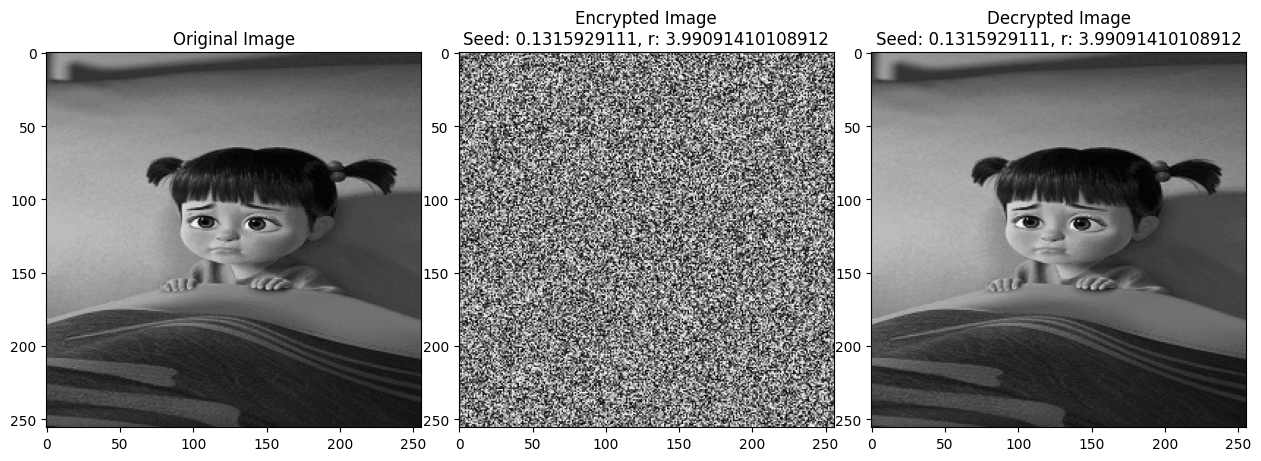

In [ ]:
#plot the images
f,axrr = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

#display the original image
plt.sca(axrr[0])
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.title('Original Image')

#display the encrypted image
plt.sca(axrr[1])
plt.imshow(encrypted_image,cmap='gray',vmin=0,vmax=255)
plt.title(f'Encrypted Image\nSeed: {seedAlice}, r: {rAlice}')

#display the decrypted image
plt.sca(axrr[2])
plt.imshow(decrypted_image,cmap='gray',vmin=0,vmax=255)
plt.title(f'Decrypted Image\nSeed: {seedBob}, r: {rBob}')

#Adjust layout for better apearance
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.1,hspace=0.1)

#show the plots
plt.show()

Alice encrypts the image data using the specified parameter values. On the receiving end, Bob successfully
reverses the encryption process using the same seed and r-value as Alice’s.

In [ ]:
plt.imshow(decrypted_image,cmap='gray')
plt.axis('off')
plt.savefig('decrypted_image',pad_inches=0,dpi=132)

#Performance Evaluation

#Entropy

In [ ]:
import skimage.measure
entropy_original = skimage.measure.shannon_entropy(image)
entropy_encrypted = skimage.measure.shannon_entropy(encrypted_image)
print("Entropy original: " + str(entropy_original) + "\nEntropy encrypted: " + str(entropy_encrypted))

Entropy original: 6.960320155953091
Entropy encrypted: 7.997122123082871


The information entropy of the encrypted image is close to 8,  thereby diminishing the possibility of any information leakage

#NCPR,UACI & Correlation

In [ ]:

import numpy as np
from PIL import Image

def calculate_npcr_uaci_correlation(original_image,encrypted_image):
    #Open the images
    original_img = original_image
    encrypted_img = encrypted_image

    # Convert images to Numpy arrays
    original_data = np.array(original_img)
    encrypted_data = np.array(encrypted_img)

    #Ensure both images have the same size
    if original_data.shape != encrypted_data.shape:
        raise ValueError("Image dimensions do not match")

    #calculate NPCR(Normalized Pixel Change Rate)
    total_pixels = original_data.size
    different_pixels = np.count_nonzero(original_data != encrypted_data)
    npcr = different_pixels / total_pixels

    #Calculate UACI (Unified Average Changing Intensity)
    uaci = np.sum(np.abs(original_data - encrypted_data)) / (255.0 * total_pixels)

    #Calculate Correlation
    correlation = np.corrcoef(original_data.flatten(),encrypted_data.flatten())[0,1]

    return npcr,uaci,correlation

original_image_path = image
encrypted_image_path = encrypted_image
npcr,uaci,correlation = calculate_npcr_uaci_correlation(original_image_path,encrypted_image_path)

print(f"NPCR: {npcr}")
print(f"UACI: {uaci}")
print(f"Correlation: {correlation}")




NPCR: 0.996063232421875
UACI: 0.49906717936197914
Correlation: -0.00487283120100931


 So, the encryption demonstrates strong resilience against differential attacks, achieving an NPCR of 99.6% and a UACI close to 49.9%.

#Histogram analysis

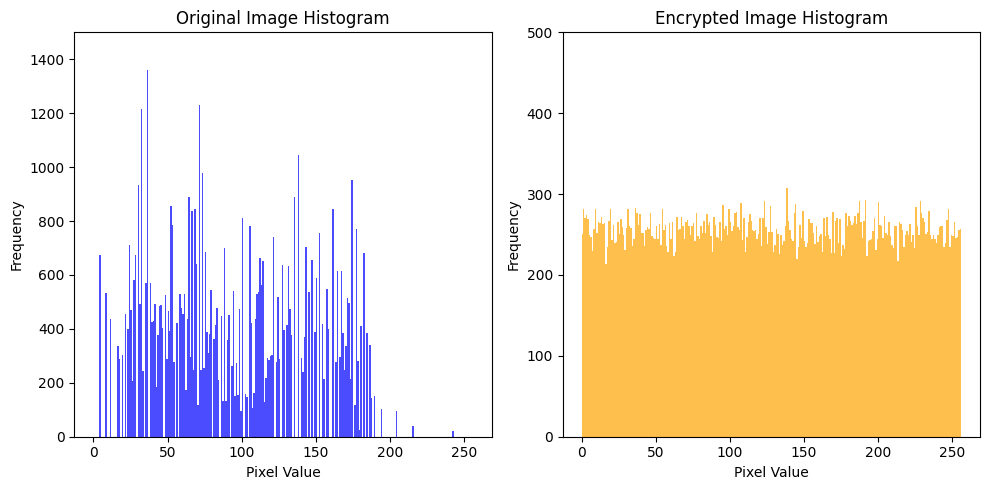

In [ ]:
# Plot histogram for the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(image.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.ylim(0,1500)
# Plot histogram for the encrypted image
plt.subplot(1, 2, 2)
plt.hist(encrypted_image.ravel(), bins=256, range=(0, 256), color='orange', alpha=0.7)
plt.title('Encrypted Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
#plt.xlim(0,500)
plt.ylim(0,500)
# Show the histograms
plt.tight_layout()
plt.show()

Furthermore,  the uniform distribution of pixel intensities in the encrypted image and the nearly 0 pixel correlations validate the efficacy of the framework.